In [65]:
%matplotlib inline

In [12]:
import time

In [44]:
import numpy as np

In [60]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
app_id, login, pw = open('config.vk', 'r').read().split('\n')

In [40]:
import vk
session = vk.AuthSession(app_id, login, pw, scope='messages')
vk_api = vk.API(session)

In [17]:
def get_dialogs(user_id):
    dialogs = vk_api('messages.getDialogs', user_id=user_id)
    return dialogs

In [42]:
hablador = '47450198'

In [38]:
def msgs():
    friend_dialog = get_dialogs(hablador)
    time.sleep(0.3)
    dialog_len = friend_dialog[0]
    friend_history = []
    if dialog_len > 200:
        resid = dialog_len
        offset = 0
        while resid > 0:
            friend_history += vk_api('messages.getHistory', user_id=hablador, count=200, offset=offset)
            time.sleep(0.3)
            resid -= 200
            offset += 200
            if resid > 0:
                print('--processing ', hablador, ': ', resid, ' of ', dialog_len, ' messages left')
    return friend_history

In [43]:
msgs()

--processing  47450198 :  9270  of  9470  messages left
--processing  47450198 :  9070  of  9470  messages left
--processing  47450198 :  8870  of  9470  messages left
--processing  47450198 :  8670  of  9470  messages left
--processing  47450198 :  8470  of  9470  messages left
--processing  47450198 :  8270  of  9470  messages left
--processing  47450198 :  8070  of  9470  messages left
--processing  47450198 :  7870  of  9470  messages left
--processing  47450198 :  7670  of  9470  messages left
--processing  47450198 :  7470  of  9470  messages left
--processing  47450198 :  7270  of  9470  messages left


KeyboardInterrupt: 

In [37]:
hablador = '141632104'

In [32]:
30525+3165

33690

In [172]:
def medmsg():
    # friends = vk_api('friends.get')
    arr = []
    for friend in people:
        time.sleep(0.3)
        arr.append(get_dialogs(friend))
    return arr

In [117]:
for i in medmsg():
    print(i)

[0]
[29, {'date': 1411505064, 'out': 1, 'mid': 100877, 'body': 'Спасибо большое!', 'uid': 47559, 'read_state': 1, 'title': ''}]
[0]
[2, {'date': 1421326012, 'out': 1, 'mid': 119124, 'body': 'Спасибо большое!', 'uid': 130314, 'read_state': 1, 'title': ''}]
[0]
[254, {'date': 1495391797, 'out': 1, 'mid': 249378, 'body': 'я посмотрела на эту колонку и поняла, что хз', 'uid': 309319, 'read_state': 1, 'title': ' ... '}]
[14206, {'date': 1497438515, 'out': 0, 'mid': 255803, 'body': 'Спс', 'uid': 478427, 'read_state': 1, 'title': ' ... '}]
[9, {'date': 1369490084, 'out': 0, 'mid': 55314, 'body': 'и то верно)', 'uid': 561421, 'read_state': 1, 'title': ''}]
[0]
[18, {'date': 1406747824, 'out': 1, 'mid': 99043, 'body': 'всегда пожалуйста', 'uid': 983485, 'read_state': 1, 'title': ''}]
[2605, {'date': 1492414539, 'out': 0, 'mid': 242646, 'body': 'Да, давай, отлично!', 'uid': 1041351, 'read_state': 1, 'title': ' ... '}]
[2, {'date': 1474633192, 'out': 1, 'mid': 207061, 'body': 'Привет, нет ещё.', 

In [173]:
all_history = medmsg()

In [174]:
history = [i for i in all_history if i[0]>=100]

In [59]:
np.mean(history)

1352.5042735042734

In [77]:
lendialogs = sorted(x[0] for x in history)

In [177]:
df = pd.DataFrame()

In [178]:
df['id'] = [i[1]['uid'] for i in history]
df['len'] = [i[0] for i in history]
df['users'] = get_unames([i[1]['uid'] for i in history])

In [108]:
def username(user_id):
    u = vk_api('users.get', user_id=str(user_id))[0]
    return u['first_name']+' '+u['last_name']

In [106]:
def get_unames(ids):
    arr = []
    for i in ids:
        arr.append(username(i))
        time.sleep(0.3)
    return arr

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64]),
 <a list of 65 Text xticklabel objects>)

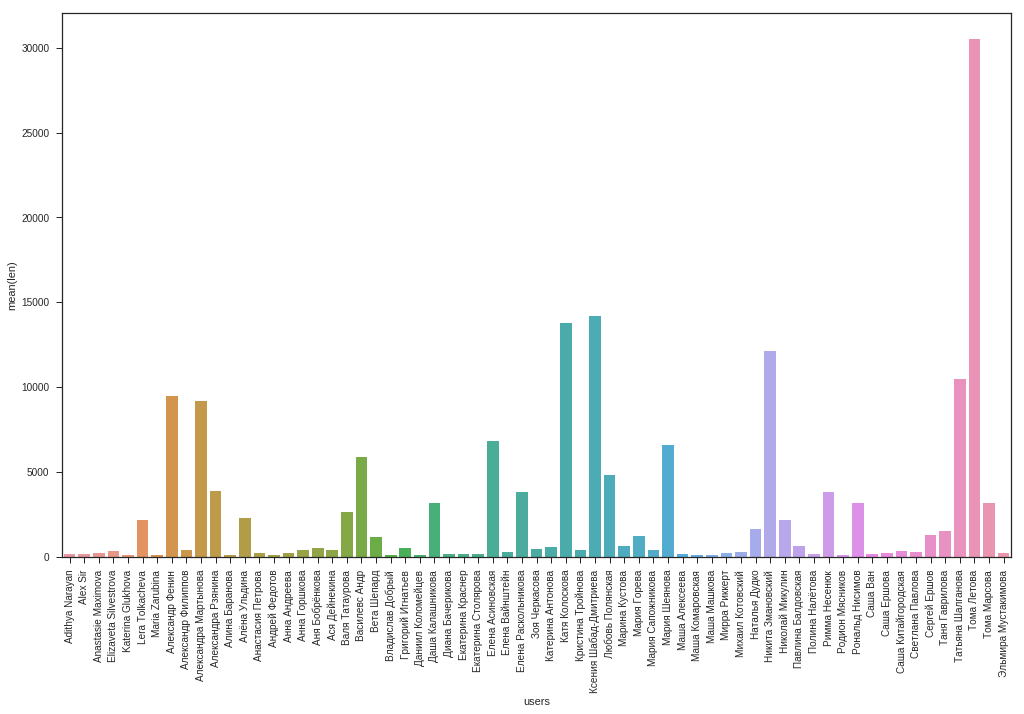

In [186]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(17,10)
sns.barplot(x='users', y='len', data=df.sort_values('users'))
plt.xticks(rotation=90)

In [187]:
df[['users', 'len']][df['len']>5000]

,users,len
3,Александр Фенин,9502
5,Мария Шеянова,6601
10,Катя Колоскова,13785
16,Никита Змановский,12136
18,Василевс Андр,5899
30,Тома Летова,30525
37,Елена Асиновская,6843
42,Ксения Шабад-Дмитриева,14206
57,Татьяна Шалганова,10472
59,Александра Мартынова,9150


In [176]:
history[1]

[254,
 {'body': 'я посмотрела на эту колонку и поняла, что хз',
  'date': 1495391797,
  'mid': 249378,
  'out': 1,
  'read_state': 1,
  'title': ' ... ',
  'uid': 309319}]

In [184]:
fig.savefig('all_dialogs_sf.png')

In [154]:
all_dialogs = vk_api('messages.getDialogs', count=200)

In [159]:
all_dialogs2 = vk_api('messages.getDialogs', count=200, offset=200)

In [160]:
all_dialogs3 = vk_api('messages.getDialogs', count=200, offset=400)

In [163]:
people = [i['uid'] for i in all_dialogs[1:] if 'admin_id' not in i and int(i['uid'])>1000]

In [166]:
people3 = [i['uid'] for i in all_dialogs3[1:] if 'admin_id' not in i and int(i['uid'])>1000]

In [167]:
people3

[112283324,
 34132732,
 62660944,
 19753715,
 7552678,
 21472860,
 12835795,
 20918869,
 4387292,
 86213992,
 40123024,
 9727748,
 7623098,
 18368927,
 51651545,
 2806839,
 41722074,
 6031446,
 9286468,
 32137544,
 6808067,
 20932261,
 19645069,
 9458354,
 4717072,
 32883241,
 26485489,
 6096346,
 7481637,
 6747442,
 3859254,
 21039806,
 12195800,
 10141644,
 20005217,
 14918399,
 19575699,
 8068813,
 33678817,
 49804730,
 43832924,
 28801437,
 5859256,
 3606265,
 13933270,
 27222642,
 4745934,
 18491465,
 41368310,
 225716,
 3534258,
 3877486,
 13845374,
 11490107,
 16102152,
 3927210,
 4139278,
 9671387,
 5667261,
 69717,
 8134016,
 34416113,
 5031009,
 22330648,
 7620417,
 15070235,
 18015183,
 4871514,
 8547370,
 6373944,
 9248120,
 8297004,
 12340184,
 4476347,
 6400135,
 5241301,
 18269335,
 18262522,
 10768994,
 3649059,
 18326616,
 5436972,
 7606752,
 6281467,
 5084026,
 3771937]

In [168]:
people = people+people2+people3

In [171]:
len(people)

407

In [170]:
people=list(set(people))